In [1]:
# Importing packages
import numpy as np
import matplotlib.pyplot as plt
from cadet import Cadet
Cadet.cadet_path = '/Users/hoangnguyen/cadet-core/cadet/bin/cadet-cli'

In [2]:
# Setting up the model
model = Cadet()
model.root.input.model.nunits = 2

In [3]:
# Inlet
model.root.input.model.unit_000.unit_type = 'INLET'
model.root.input.model.unit_000.ncomp = 2
model.root.input.model.unit_000.inlet_type = 'PIECEWISE_CUBIC_POLY'

In [4]:
# Outlet
model.root.input.model.unit_001.unit_type = 'OUTLET'
model.root.input.model.unit_001.ncomp = 2

In [5]:
model.root.input.solver.sections.nsec = 2
model.root.input.solver.sections.section_times = [0.0, 1.0, 2.0,]    # min
model.root.input.solver.sections.section_continuity = [0, 0,]

In [6]:
model.root.input.model.unit_000.sec_000.const_coeff = [0.0, 0.5,]    # mol / m^3
model.root.input.model.unit_000.sec_001.const_coeff = [2.0, 1.0,]    # mol / m^3

In [7]:
# System connectivity
model.root.input.model.connections.nswitches = 1
model.root.input.model.connections.switch_000.section = 0
model.root.input.model.connections.switch_000.connections = [
    0, 1, -1, -1, 1, # unit_000, unit_001, all components, all components, Q/ L/min
]  

In [8]:
# Setting up the simulator and run simulation
model.root.input.model.solver.gs_type = 1
model.root.input.model.solver.max_krylov = 0
model.root.input.model.solver.max_restarts = 10
model.root.input.model.solver.schur_safety = 1e-8

# Number of cores for parallel simulation
model.root.input.solver.nthreads = 1

# Tolerances for the time integrator
model.root.input.solver.time_integrator.abstol = 1e-6
model.root.input.solver.time_integrator.algtol = 1e-10
model.root.input.solver.time_integrator.reltol = 1e-6
model.root.input.solver.time_integrator.init_step_size = 1e-6
model.root.input.solver.time_integrator.max_steps = 1000000

In [9]:
# Solution times
model.root.input.solver.user_solution_times = np.linspace(0, 2, 1001)

In [10]:
# Return data
model.root.input['return'].split_components_data = 0
model.root.input['return'].split_ports_data = 0
model.root.input['return'].unit_000.write_solution_bulk = 1
model.root.input['return'].unit_000.write_solution_inlet = 1
model.root.input['return'].unit_000.write_solution_outlet = 1

# Copy settings to the other unit operations
model.root.input['return'].unit_001 = model.root.input['return'].unit_000

In [11]:
# Running simulation
model.filename = 'generating-flow-ncomps-2.h5'
model.save()

data = model.run()

if data.returncode == 0:
    print("Simulation completed successfully")
    model.load()
else:
    print(data)
    raise Exception("Simulation failed")

Simulation completed successfully


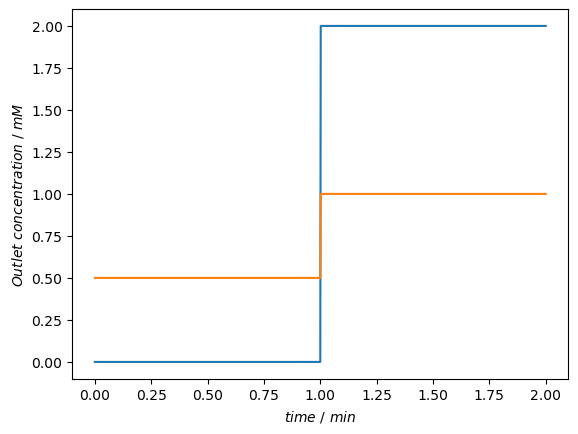

In [12]:
# Plotting the results
plt.figure()
time = model.root.output.solution.solution_times
c = model.root.output.solution.unit_001.solution_inlet
plt.plot(time, c)
plt.xlabel('$time~/~min$')
plt.ylabel('$Outlet~concentration~/~mM$')
plt.show()

In [13]:
# Multiple sections
# Inlet
model.root.input.model.unit_000.ncomp = 1

# Outlet
model.root.input.model.unit_001.ncomp = 1

In [14]:
model.root.input.solver.sections.nsec = 3
model.root.input.solver.sections.section_times = [0.0, 1.0, 2.0, 3.0] # min
model.root.input.solver.sections.section_continuity = [0, 0, 0]

In [15]:
model.root.input.model.unit_000.sec_000.const_coeff = [0.0,]    # mol / m^3
model.root.input.model.unit_000.sec_000.lin_coeff = [1.0,]      # mol / m^3 / min

model.root.input.model.unit_000.sec_001.const_coeff = [1.0,]    # mol / m^3
model.root.input.model.unit_000.sec_001.lin_coeff = [0.0,]      # mol / m^3 / min

model.root.input.model.unit_000.sec_002.const_coeff = [1.0,]    # mol / m^3
model.root.input.model.unit_000.sec_002.lin_coeff = [-1.0,]     # mol / m^3 / min

model.root.input.solver.user_solution_times = np.linspace(0, 3.0, 1001)

In [16]:
# Running simulation
model.filename = 'generating-flow-nsecs-3.h5'
model.save()

data = model.run()

if data.returncode == 0:
    print("Simulation completed successfully")
    model.load()
else:
    print(data)
    raise Exception("Simulation failed")

Simulation completed successfully


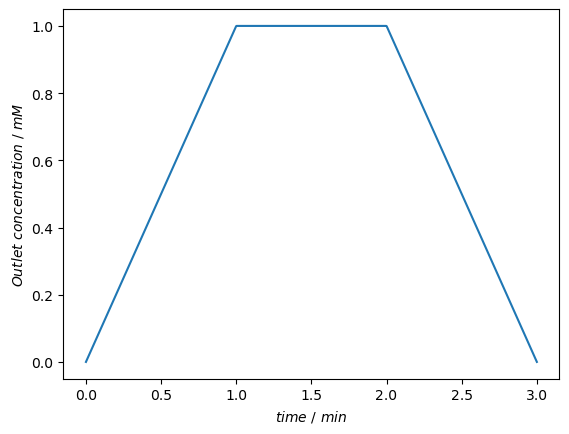

In [17]:
# Plotting the results
plt.figure()
time = model.root.output.solution.solution_times
c = model.root.output.solution.unit_001.solution_inlet
plt.plot(time, c)
plt.xlabel('$time~/~min$')
plt.ylabel('$Outlet~concentration~/~mM$')
plt.show()